# Step Forward Cross Validation for Bioactivity Prediction

## Plotting Chemical Space wrt Split type

In [1]:
import os

os.chdir('../sfcv/')
from datasplit import SortedStepForwardCV, UnsortedStepForwardCV, ScaffoldSplitCV, RandomSplitCV

os.chdir('../notebook/')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from chemplot import Plotter

In [3]:
df = pd.read_csv("../benchmark/data/processed/target_CHEMBL1865-1.IC50.csv")

In [4]:
cv_splitters = {
    "RandomSplit": RandomSplitCV(frac_train=0.9, n_folds=10, seed=69420),
    "ScaffoldSplit": ScaffoldSplitCV(smiles_col='standardized_smiles', n_folds=10,
                                     frac_train=0.9, seed=69420, include_chirality=False),
    "SortedStepForward": SortedStepForwardCV(sorting_col="LogD", ideal=2, n_bins=10, ascending=False),
    "UnsortedStepForward": UnsortedStepForwardCV(n_bins=10, random_state=69420)
}

In [5]:
def add_cv_split_columns(df, cv_splitters):
    df = df.copy()

    # Iterate over each split type
    for split_name, cv_splitter in cv_splitters.items():
        # Iterate over folds
        for fold_idx, (train_idx, test_idx) in enumerate(cv_splitter.split(df), start=1):
            col_name = f"{split_name}_Fold_{fold_idx}"  # Create column name

            # Initialize all entries as "None"
            df[col_name] = "None"

            # Assign "Train" and "Test" labels
            df.loc[train_idx, col_name] = "Train"
            df.loc[test_idx, col_name] = "Test"

    return df

In [9]:
df_splits = add_cv_split_columns(df, cv_splitters)
df_splits

/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


,assay_chembl_id,compound_chembl_id,canonical_smiles,pchembl_value,standardized_smiles,LogD,LogP,MCE18,RandomSplit_Fold_1,RandomSplit_Fold_2,...,SortedStepForward_Fold_9,UnsortedStepForward_Fold_1,UnsortedStepForward_Fold_2,UnsortedStepForward_Fold_3,UnsortedStepForward_Fold_4,UnsortedStepForward_Fold_5,UnsortedStepForward_Fold_6,UnsortedStepForward_Fold_7,UnsortedStepForward_Fold_8,UnsortedStepForward_Fold_9
0,CHEMBL1113906,CHEMBL1095450,Cc1c(-c2ccccc2)nc(-c2cccc(/C=C/C(=O)NO)c2)n1CC...,7.20,Cc1c(-c2ccccc2)nc(-c2cccc(/C=C/C(=O)NO)c2)n1CC...,2.311556,3.37632,88.101562,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train
1,CHEMBL1113906,CHEMBL1096093,Cc1c(-c2ccccc2)nc(-c2cccc(/C=C/C(=O)NO)c2)n1[C...,7.10,Cc1c(-c2ccccc2)nc(-c2cccc(/C=C/C(=O)NO)c2)n1[C...,3.159037,5.08942,120.227273,Train,Test,...,Train,None,Test,Train,Train,Train,Train,Train,Train,Train
2,CHEMBL1113906,CHEMBL1095710,CN(C)CCn1c(-c2cccc(/C=C/C(=O)NO)c2)nc2ccccc21,7.10,CN(C)CCn1c(-c2cccc(/C=C/C(=O)NO)c2)nc2ccccc21,1.106886,2.78350,51.000000,Train,Train,...,Train,None,None,Test,Train,Train,Train,Train,Train,Train
3,CHEMBL1113906,CHEMBL1094792,C[C@H](c1ccccc1)n1c(-c2cccc(/C=C/C(=O)NO)c2)nc...,7.40,C[C@H](c1ccccc1)n1c(-c2cccc(/C=C/C(=O)NO)c2)nc...,3.848375,4.83120,105.000000,Train,Train,...,Train,None,None,None,None,None,None,None,Test,Train
4,CHEMBL1113906,CHEMBL1096705,Cc1nc(-c2cccc(/C=C/C(=O)NO)c2)n(CCc2ccccc2)c1C...,7.30,Cc1nc(-c2cccc(/C=C/C(=O)NO)c2)n(CCc2ccccc2)c1C...,4.437858,5.21062,84.000000,Train,Train,...,Train,None,Test,Train,Train,Train,Train,Train,Train,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,CHEMBL5042562,CHEMBL5070393,O=C(NO)c1ccc(CN(Cc2cccc(F)c2)S(=O)(=O)c2cc(F)c...,7.85,O=C(NO)c1ccc(CN(Cc2cccc(F)c2)S(=O)(=O)c2cc(F)c...,3.337046,3.89220,69.000000,Train,Train,...,Train,None,None,None,None,None,None,Test,Train,Train
690,CHEMBL5042562,CHEMBL5092466,O=C(NO)c1ccc(CN(Cc2ccccc2)S(=O)(=O)c2cc(F)c(F)...,8.30,O=C(NO)c1ccc(CN(Cc2ccccc2)S(=O)(=O)c2cc(F)c(F)...,3.514791,3.75310,66.000000,Train,Train,...,Train,None,Test,Train,Train,Train,Train,Train,Train,Train
691,CHEMBL5042562,CHEMBL5080426,O=C(NO)c1ccc(CN(Cc2ccccc2)S(=O)(=O)c2c(F)c(F)c...,8.05,O=C(NO)c1ccc(CN(Cc2ccccc2)S(=O)(=O)c2c(F)c(F)c...,3.565053,3.89220,69.000000,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train
692,CHEMBL5042562,CHEMBL5086440,O=C(NO)c1ccc(CN(Cc2ccncc2)S(=O)(=O)c2c(F)c(F)c...,7.85,O=C(NO)c1ccc(CN(Cc2ccncc2)S(=O)(=O)c2c(F)c(F)c...,2.296710,3.28720,69.000000,Train,Train,...,Train,None,None,None,Test,Train,Train,Train,Train,Train


In [12]:
target_list = ["RandomSplit_Fold_9", "ScaffoldSplit_Fold_9", "SortedStepForward_Fold_9", "UnsortedStepForward_Fold_9"]

In [18]:
import numpy as np

sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.


/Users/manasmahale/projects/sfcv/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


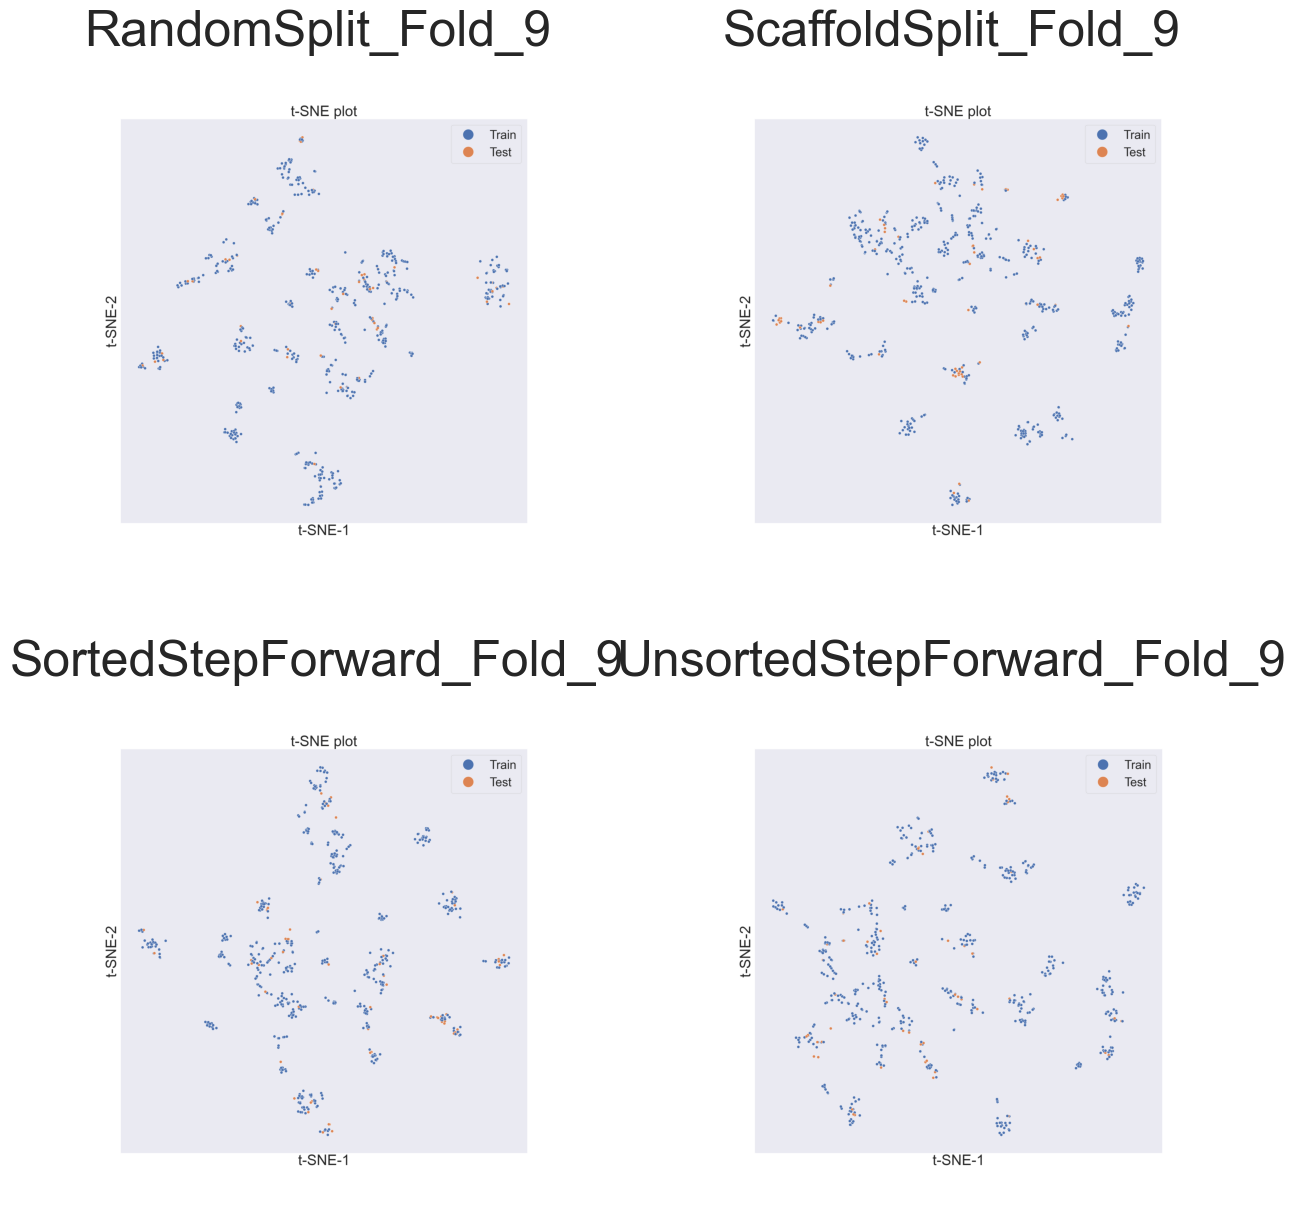

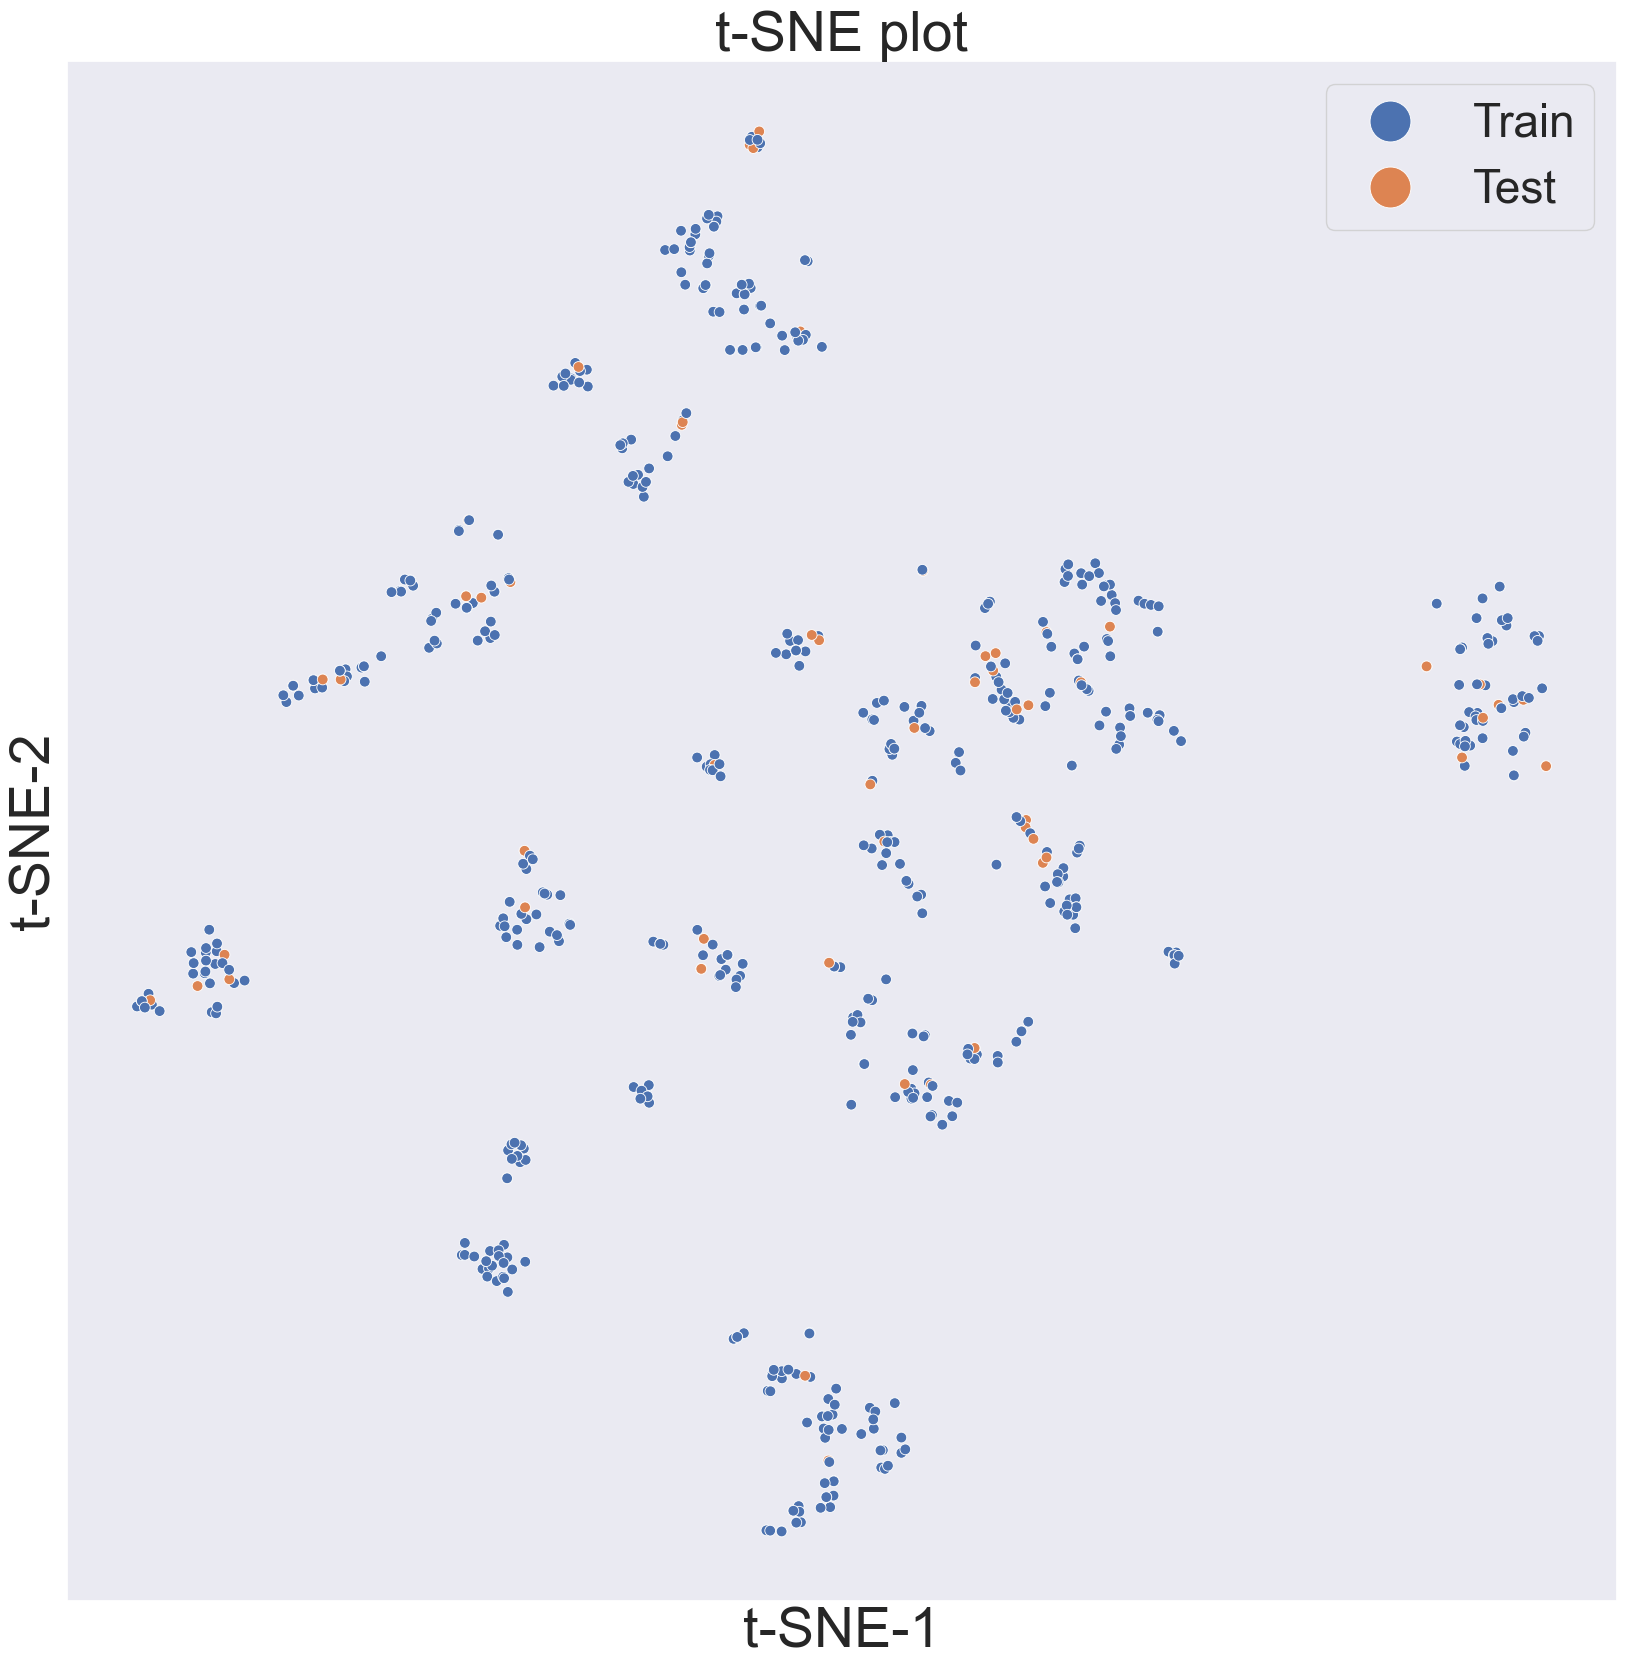

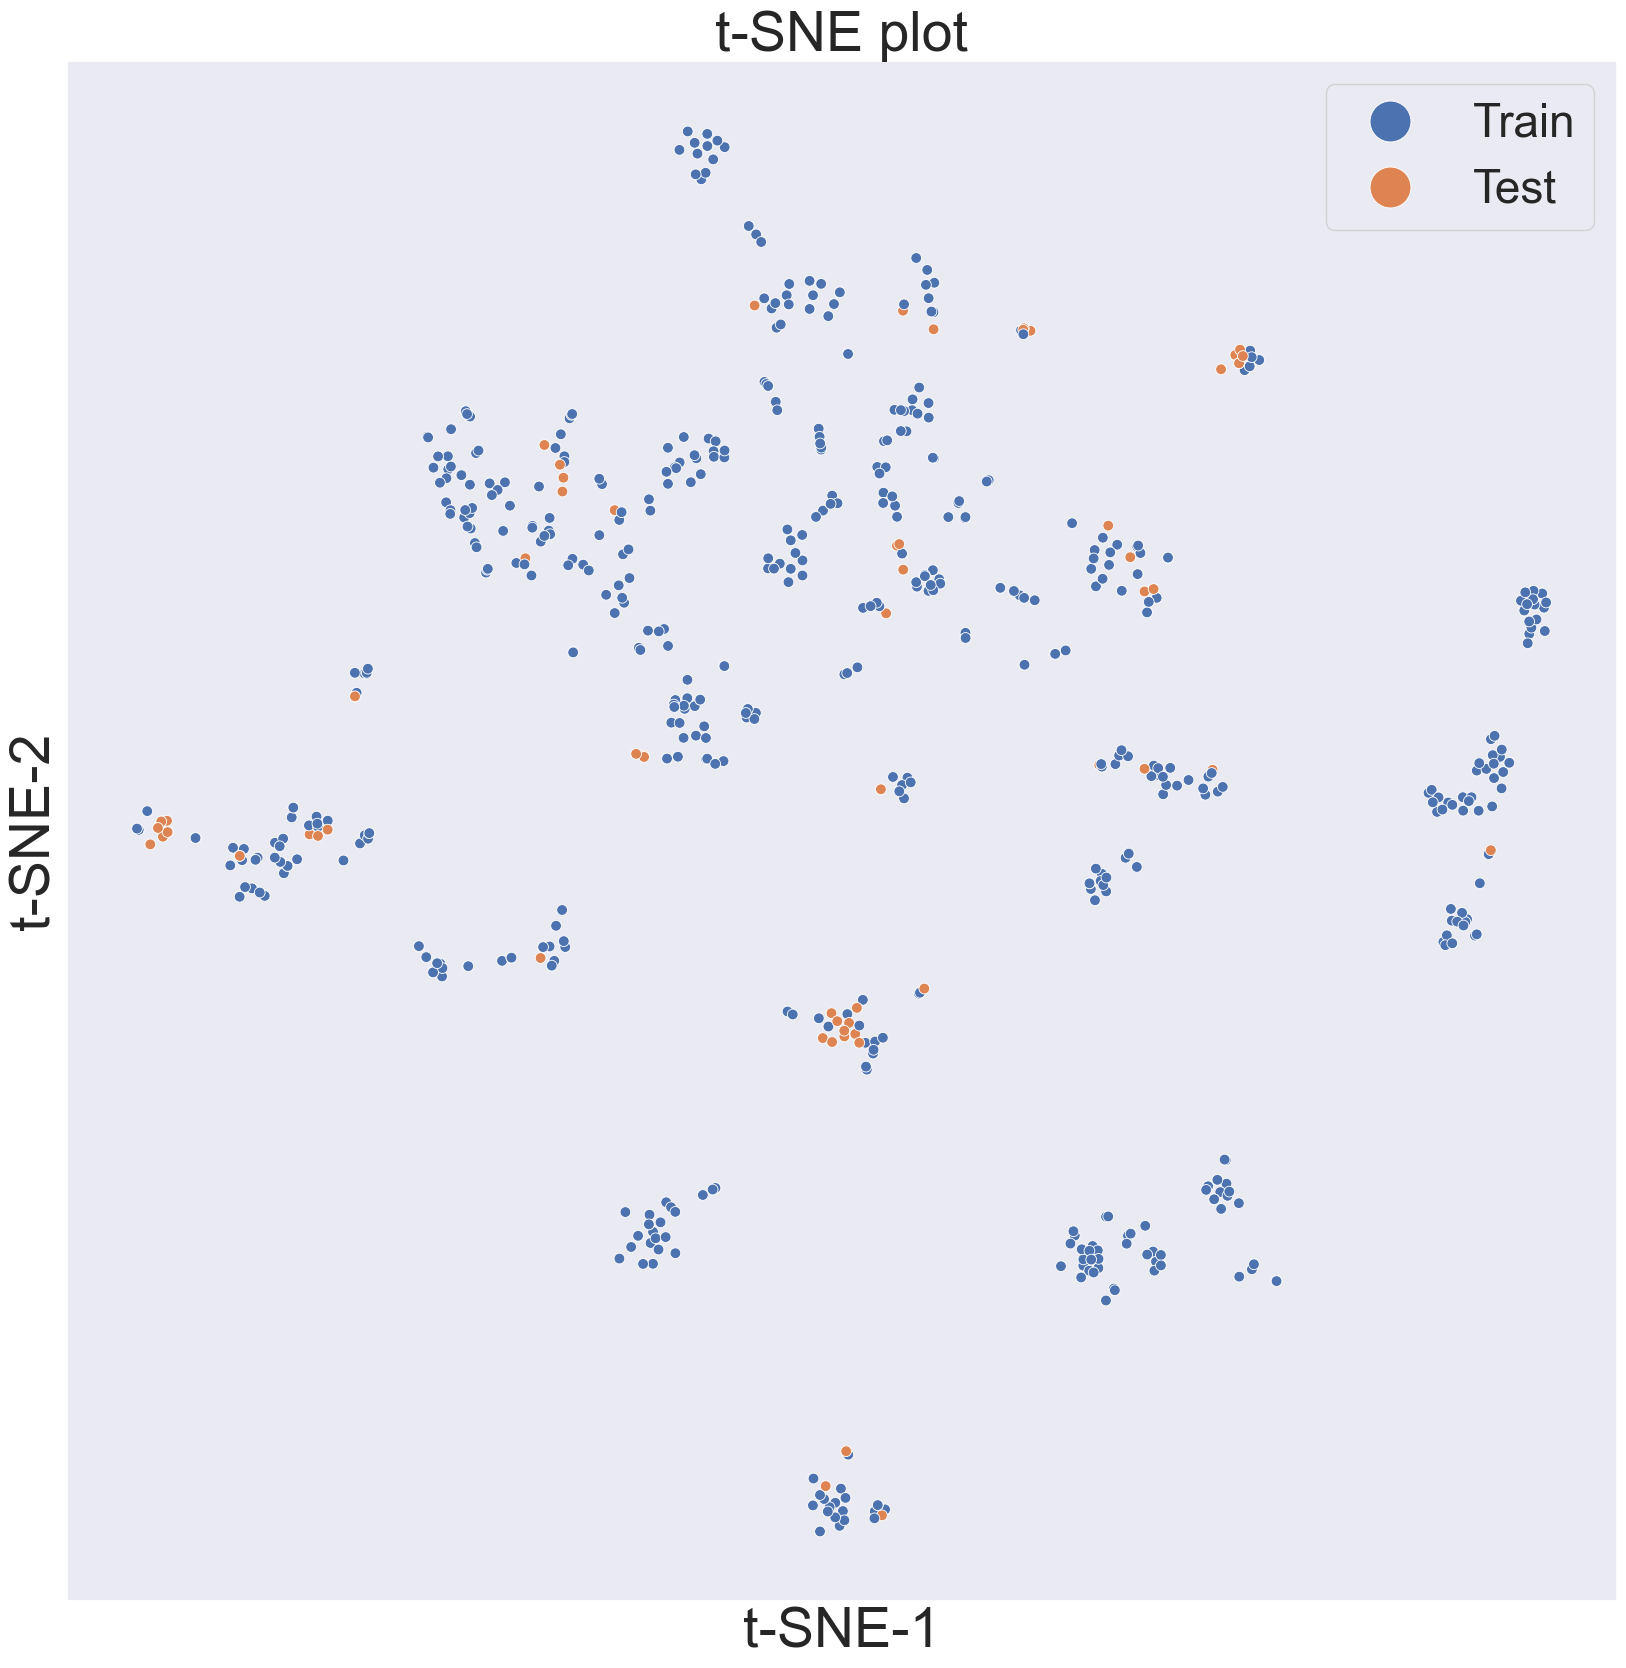

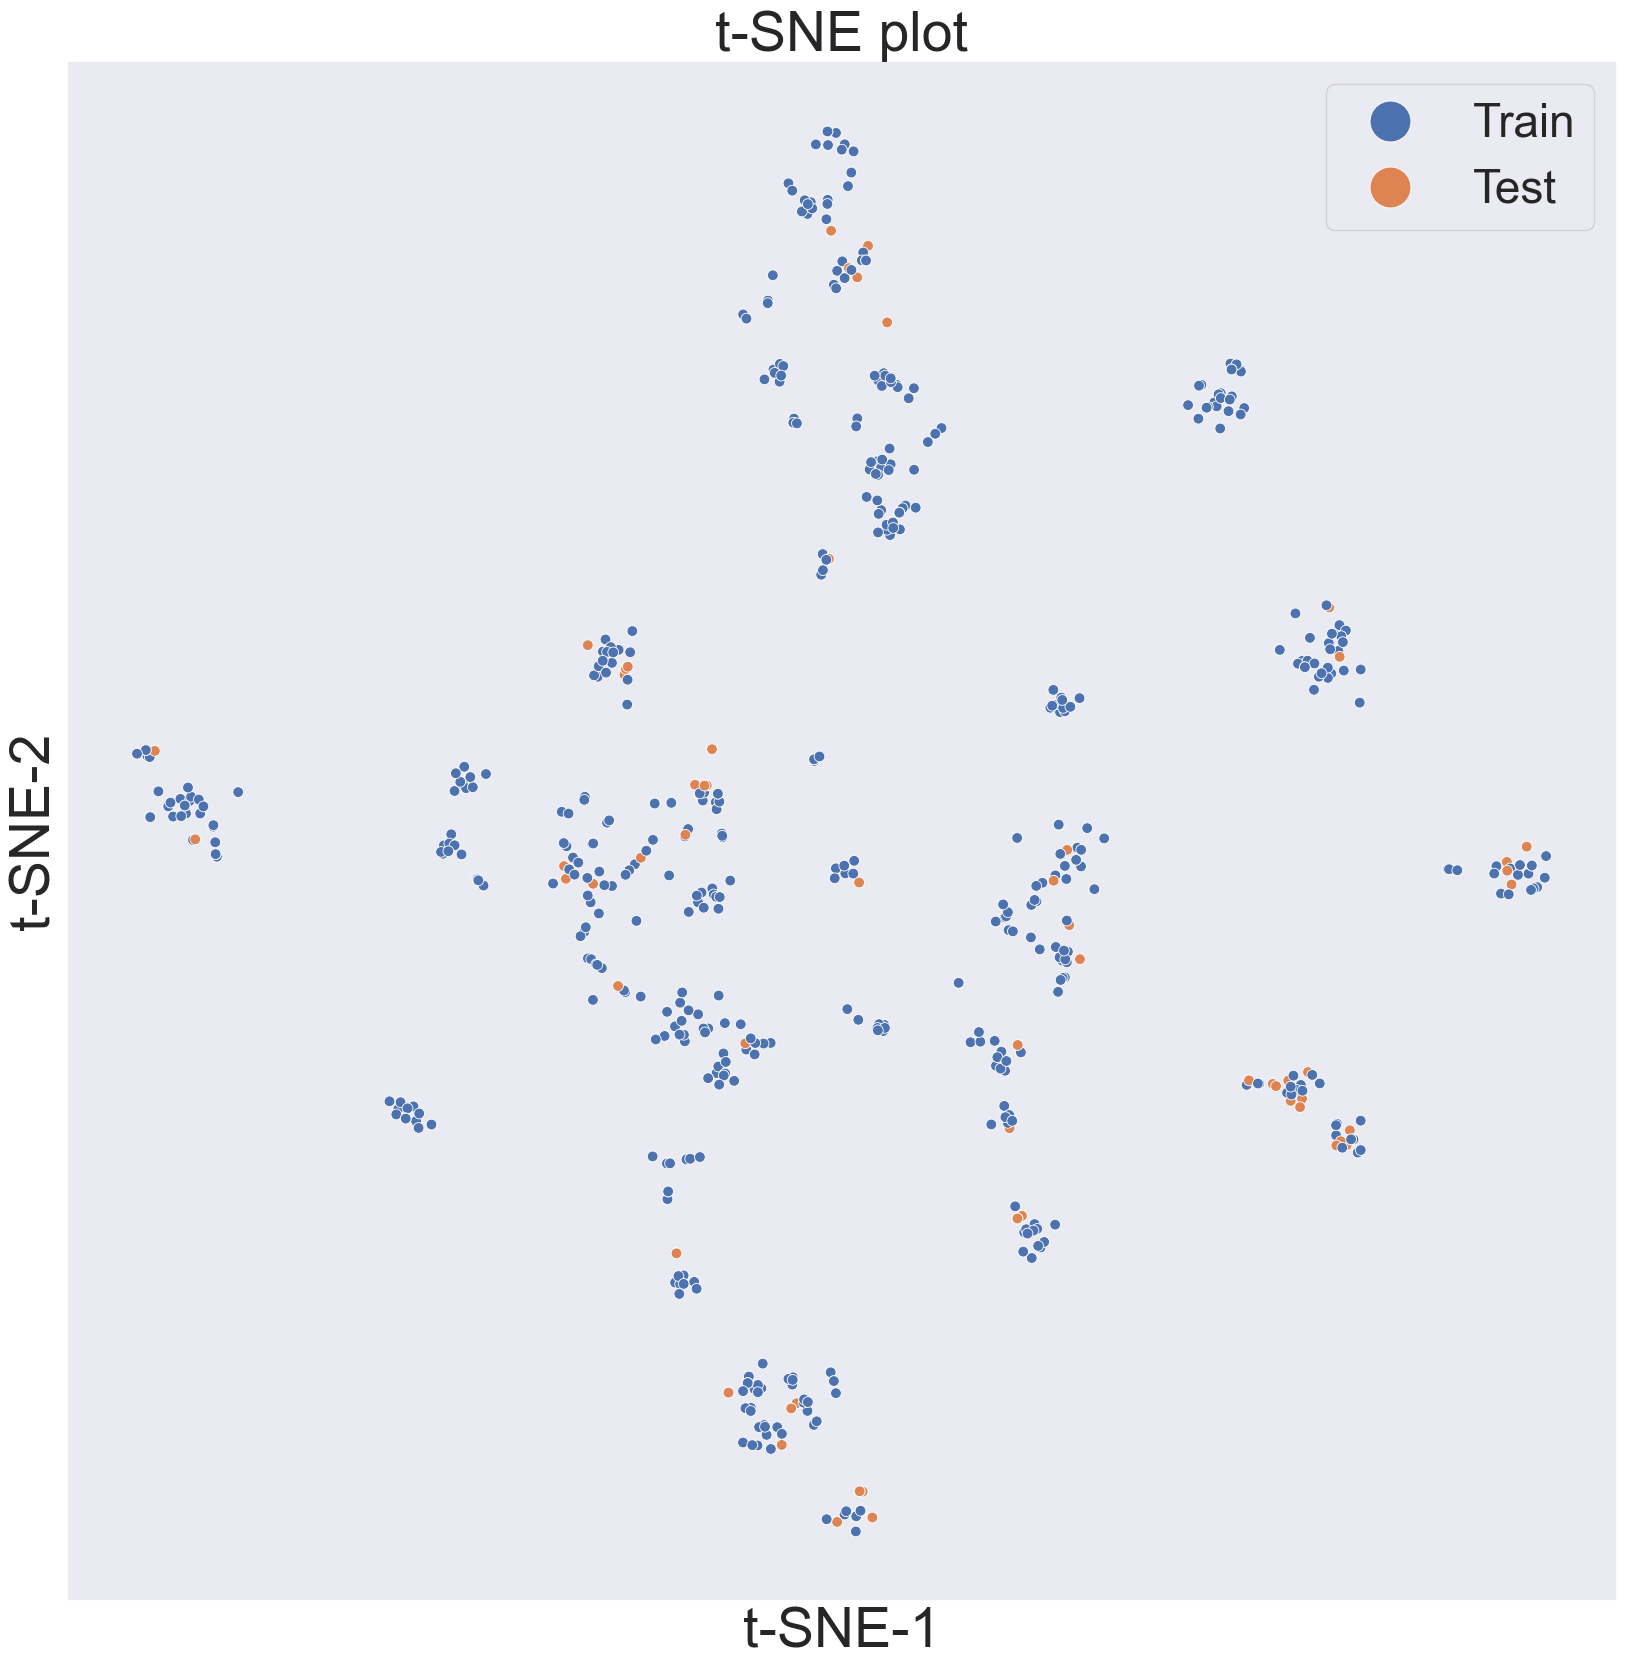

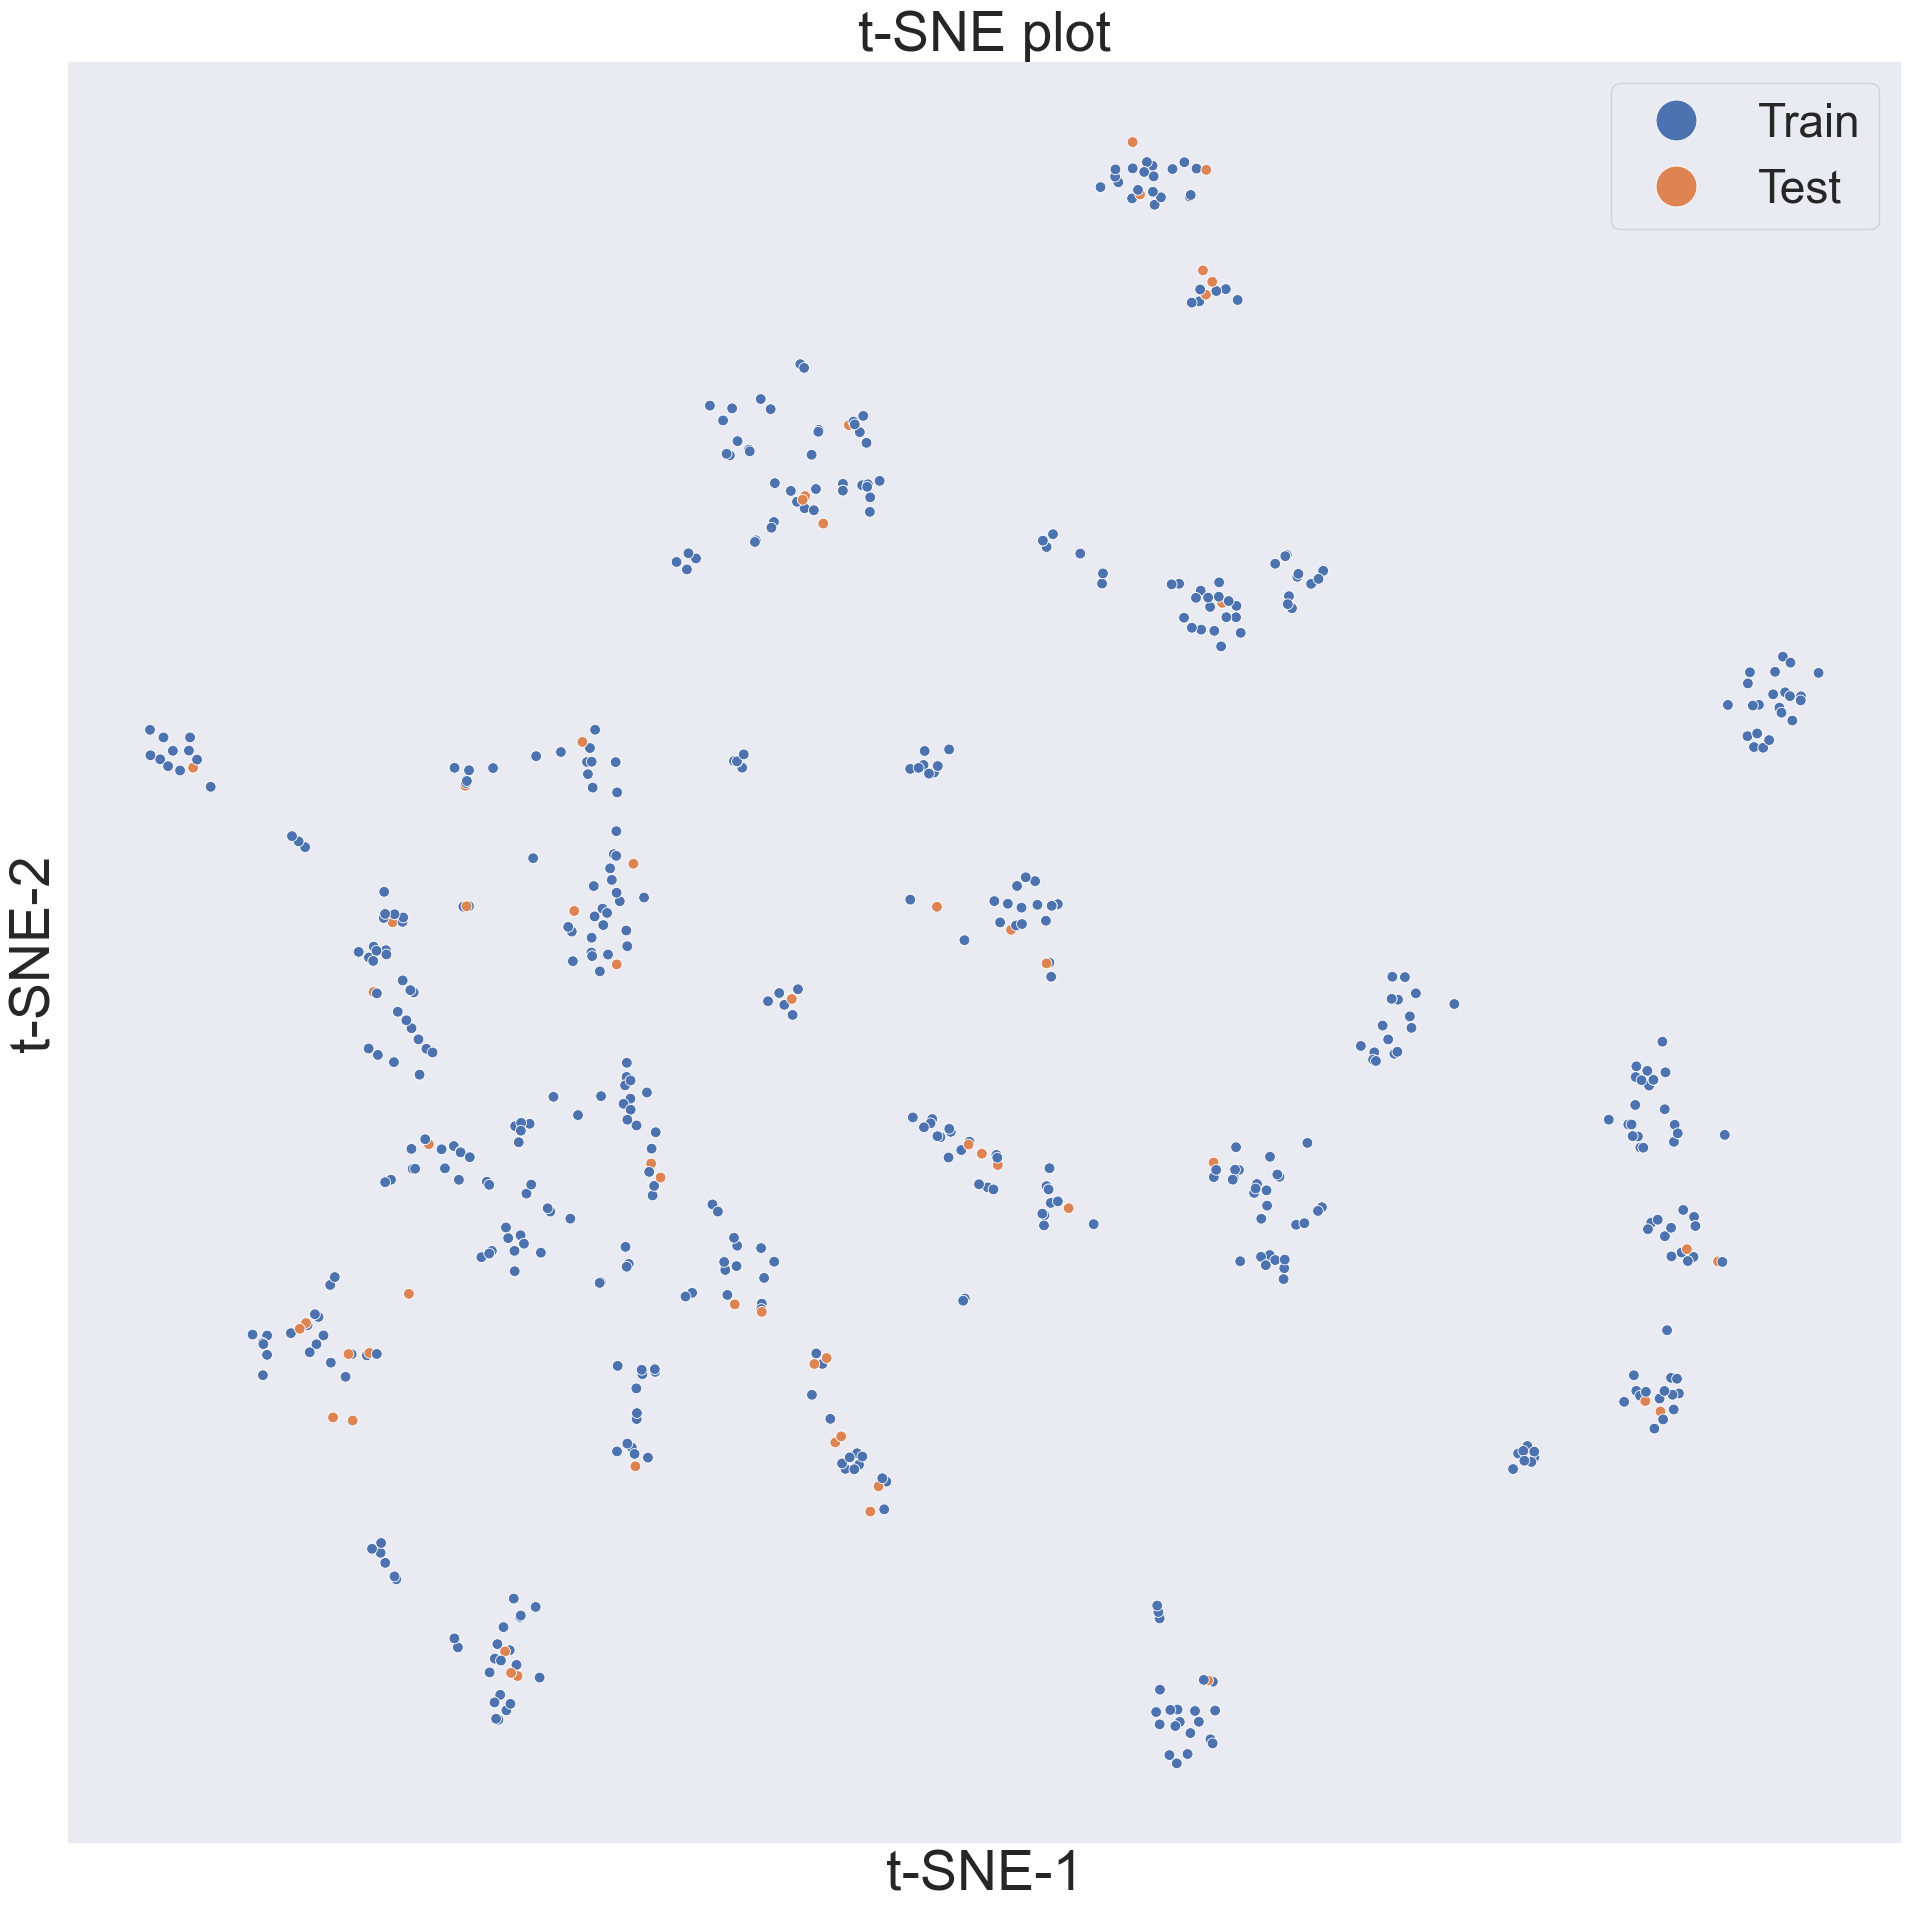

In [20]:
# Create a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()  # Flatten for easier iteration

for i, target in enumerate(target_list):
    # Create a Plotter object
    cp = Plotter.from_smiles(
        df_splits["standardized_smiles"],
        target=df_splits[target],
        target_type="C"  # Adjust if needed
    )

    # Generate t-SNE visualization
    cp.tsne()

    # Capture the returned Axes from visualize_plot()
    ax = cp.visualize_plot()

    # Copy the current figure to the subplot
    src_fig = ax.figure  # Get the figure object from the Axes
    src_canvas = src_fig.canvas
    src_canvas.draw()

    # Convert to an image
    img = np.array(src_canvas.renderer.buffer_rgba())

    # Display the image in the subplot
    axes[i].imshow(img)
    axes[i].axis("off")  # Hide axis for clean visualization
    axes[i].set_title(target)

plt.tight_layout()
plt.savefig("../benchmark/results/figures/chemical_space_across_split_fold_9.svg")
plt.show()